In [1]:
%load_ext autoreload
%autoreload 2

# if you need to install Pybullet:
#   pip3 install Pybullet   (python3)
#   pip install PyBullet    (python2.x)

# let's start with imports
import numpy as np
from numpy.random import seed
from numpy.random import rand
import pybullet as p

from engine import *
from matplotlib import pyplot as plt

# seed random number generator.
seed(1)

%matplotlib inline

pybullet build time: Nov 14 2024 18:27:01


In [2]:
# create a pybullet engine from the engine module
engine = PyBulletEnvironment(gui=False)


In [3]:
#load shovel
startPos = [0,0,0]
startOrientation = p.getQuaternionFromEuler([0,0,0])
# robot_urdf = './urdf/shovel/shovelFlat.urdf'
robot_urdf = './urdf/shovel/rover_with_shovel.urdf'

# load the robot
engine.open_environment(robot_urdf, startPos, startOrientation)

In [4]:
# load pebbles

# get shovel_link position
shovelLinkState = p.getLinkState(engine.ID[1], 2)

# admissible init positions
# minpos = np.asarray(shovelLinkState[0]) 
minpos = np.array([0.2,-0.4,0])
maxpos = np.array([0.7, 0.4, 0])
# maxpos = np.asarray(shovelLinkState[0]) + 4*1e-1

# number of pebbles
pebbleNum = 100
# scatter pebbles
for i in range (pebbleNum):
    
    # generate init pos
    startPos = minpos + (rand(3) * (maxpos - minpos))
    startPos[-1] = 0.2
    
    # set orientation
    startOrientation = p.getQuaternionFromEuler([0,0,0])
    
    # load pebble 
    engine.load_urdf('./urdf/pebbles/pebbles.urdf', startPos, startOrientation)    
    
# simulate
engine.simulate(0.5)

In [23]:
minpos

array([-0.035,  0.045,  0.026])

In [21]:
minpos + (rand(3) * (maxpos - minpos))

array([0.09474498, 0.39416895, 0.36388384])

In [18]:
robot = engine.ID[1]

num_joints = p.getNumJoints(robot)
print("Joint Information:")
for i in range(num_joints):
    info = p.getJointInfo(robot, i)
    print(f"Joint {i}: {info[1].decode('utf-8')}")

Joint Information:
Joint 0: base_to_lwheel
Joint 1: base_to_rwheel
Joint 2: base_to_lwheel_back
Joint 3: base_to_rwheel_back
Joint 4: base_to_fattach


In [6]:
import time
# Get joint indices for wheels
left_wheel_joint = 0  # Index for left wheel joint
right_wheel_joint = 1  # Index for right wheel joint

robot = engine.ID[1]
# Simulate
try:
    for _ in range(1000):  # Run for some steps
        # Set wheel velocities
        p.setJointMotorControl2(robot, 3, p.VELOCITY_CONTROL, targetVelocity=0, force=0)
        p.setJointMotorControl2(robot, 2, p.VELOCITY_CONTROL, targetVelocity=.0, force=0)
        p.setJointMotorControl2(robot, left_wheel_joint, p.VELOCITY_CONTROL, targetVelocity=-0.50, force=0.1)
        p.setJointMotorControl2(robot, right_wheel_joint, p.VELOCITY_CONTROL, targetVelocity=-4.0, force=0.1)

        p.stepSimulation()  # Advance simulation
        time.sleep(1. / 240.)  # Sleep to match real-time

except KeyboardInterrupt:
    print("Simulation stopped.")

# Disconnect
# p.disconnect()

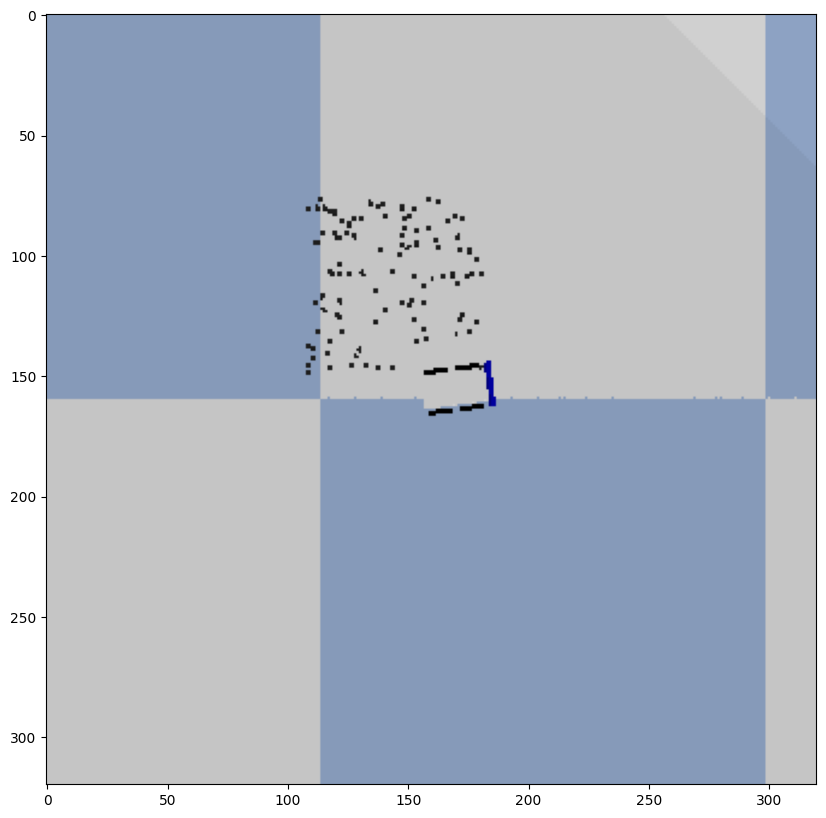

In [7]:
img = engine.get_top_view()
im = np.array(img[2])
im = im.reshape((img[0],img[1], 4))
plt.figure(figsize=(10,10))
plt.imshow(im[:,:, :3])